In [1]:
%run technical_trading.py

/Applications/anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


/Users/jianboxue/Documents/Research_Projects/Trading_Strategies/Technical_Trading/technical_trading.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal['2'][signal['2'] > 0] = 1
/Users/jianboxue/Documents/Research_Projects/Trading_Strategies/Technical_Trading/technical_trading.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  signal['2'][signal['2'] < 0] = -1


Entire data start date: 2005-01-04
Entire data end date: 2015-10-30


Backtest Months: 125
                   Backtest
annual_return          0.39
annual_volatility      0.30
sharpe_ratio           1.31
calmar_ratio           1.41
stability              0.85
max_drawdown          -0.28
omega_ratio            1.27
sortino_ratio          1.90
skewness              -0.33
kurtosis               3.12
alpha                   NaN
beta                    NaN


KeyError: ("None of [DatetimeIndex(['2005-01-04', '2005-01-05', '2005-01-06', '2005-01-07',\n               '2005-01-10', '2005-01-11', '2005-01-12', '2005-01-13',\n               '2005-01-14', '2005-01-17',\n               ...\n               '2005-07-04', '2005-07-05', '2005-07-06', '2005-07-07',\n               '2005-07-08', '2005-07-11', '2005-07-12', '2005-07-13',\n               '2005-07-14', '2005-07-15'],\n              dtype='datetime64[ns, UTC]', name='date', length=127, freq=None)] are in the [index]", 'occurred at index SMB')

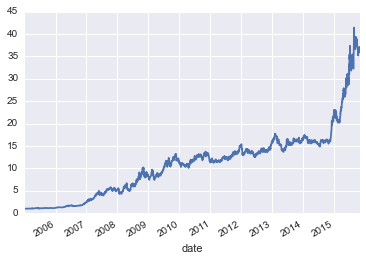

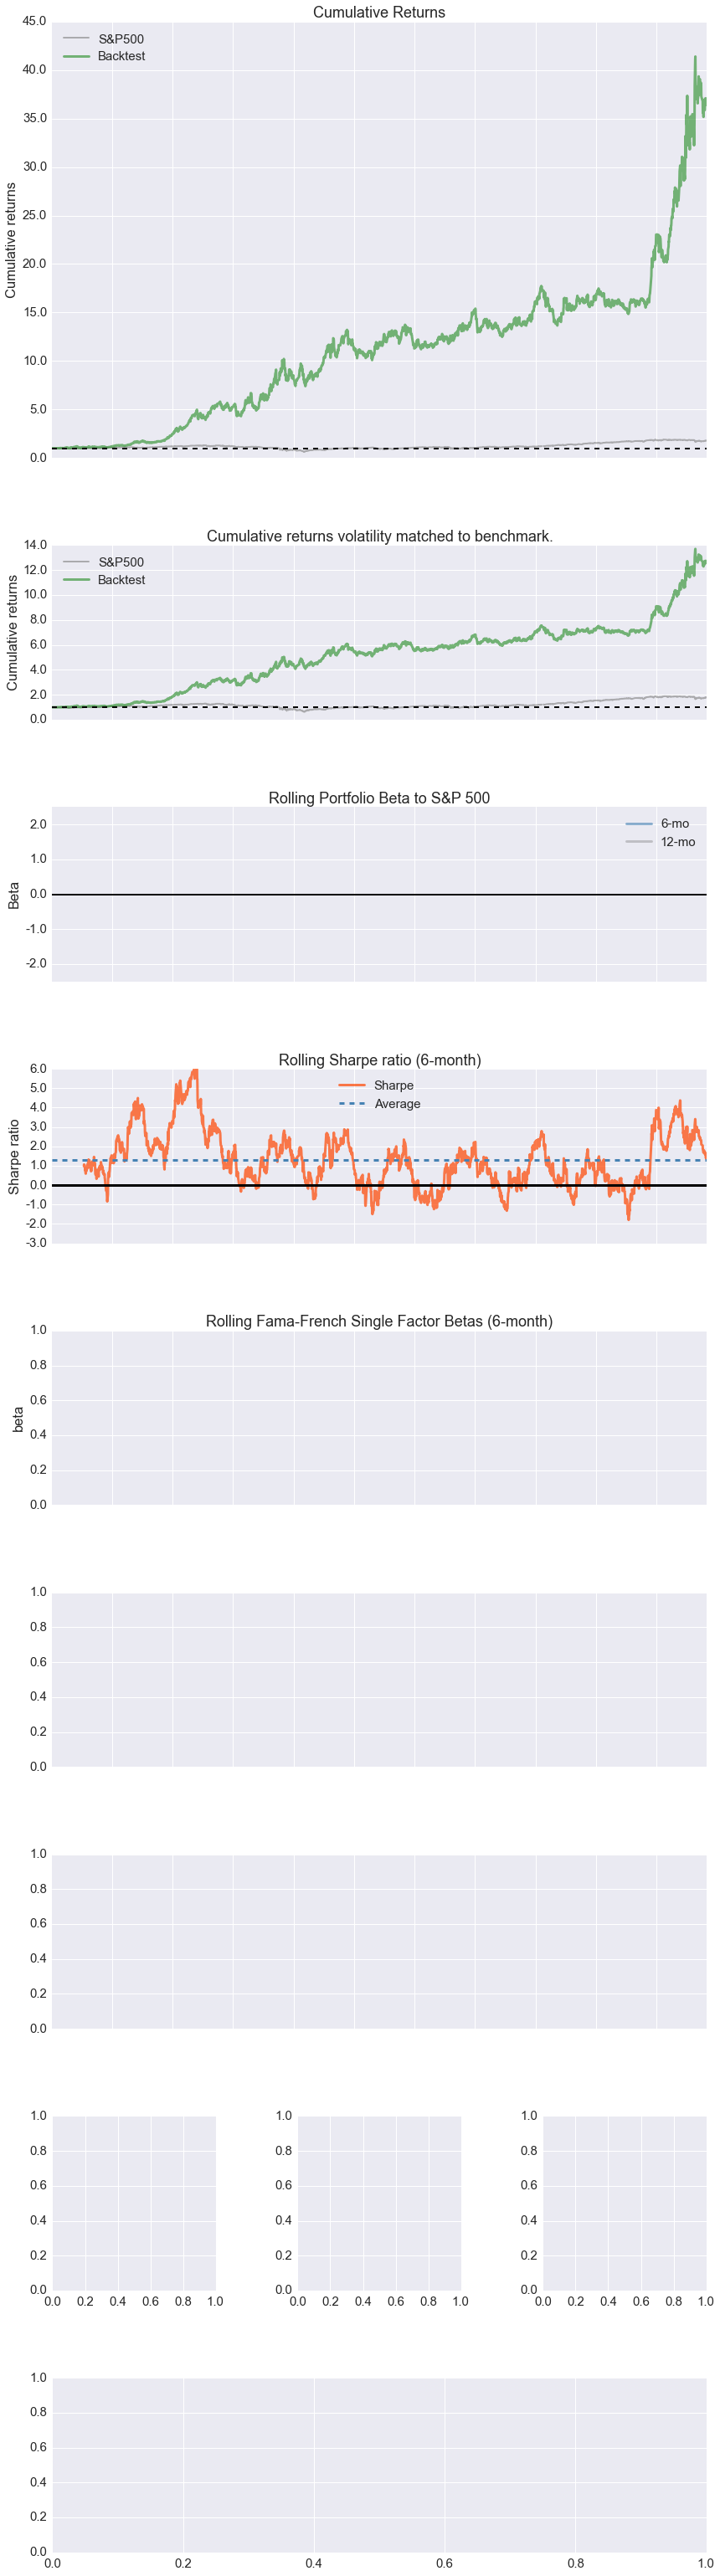

In [31]:
#%%
data = pd.read_csv('../../data/hs300.csv',index_col = 'date',parse_dates = 'date')
data.vol = data.vol.astype(float)
#start = pd.Timestamp('2005-09-01')
#end = pd.Timestamp('2012-03-15')
#data = data[start:end]
#%%
chaikin = CHAIKINAD(data, m = 14, n = 16)
kdj = KDJ(data)
adx = ADX(data)
emv = EMV(data, n = 20, m = 23)
cci = CCI(data, n=20, m = 8)
bbands = BBANDS(data, n =20, m=2)
aroon = AROON(data)
cmo = CMO(data)

#%%
signal = pd.DataFrame(index=data.index)
#signal['kdj'] = kdj['2']
signal['chaikin'] = chaikin['3']
signal['emv'] = emv['2']
signal['adx'] = adx['1']
signal['cci'] = cci['2']
signal['aroon'] = aroon['2']
signal['cmo'] = cmo['2']
signal['bbands'] = bbands['1']
signal = signal.fillna(0)

returns_c = Backtest(data, signal.mode(axis=1).ix[:,0])
(1+returns_c).cumprod().plot()
#%%
oos_date = pd.Timestamp('2012-03-15')
#pf.create_returns_tear_sheet(returns, live_start_date=oos_date)
pf.create_full_tear_sheet(returns_c)
#%%

In [ ]:
%matplotlib inline
(1+returns_c).cumprod().plot()

In [7]:
returns = pd.DataFrame(index=data.index)
#signal['kdj'] = kdj['2']
returns['chaikin'] = np.array(Backtest(data, chaikin['3']))
returns['emv'] = np.array(Backtest(data, emv['2']))
returns['adx'] = np.array(Backtest(data, adx['1']))
returns['cci'] = np.array(Backtest(data, cci['2']))
returns['aroon'] = np.array(Backtest(data, aroon['2']))
returns['cmo'] = np.array(Backtest(data, cmo['2']))
returns['bbands'] = np.array(Backtest(data, bbands['1']))
returns = returns.fillna(0)

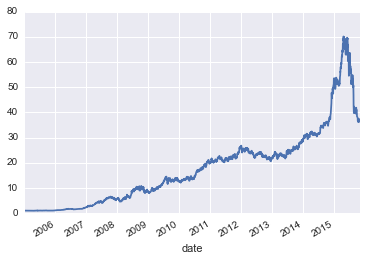

In [8]:
(1+returns['chaikin']).cumprod().plot()

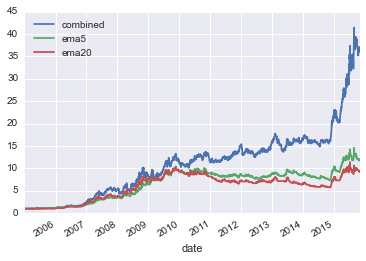

In [36]:
nav = pd.DataFrame()
nav['combined'] = (1+returns_c).cumprod()
ema5 = talib.EMA(np.array(nav['combined']), 5)
ema20 = talib.EMA(np.array(nav['combined']), 20)
signal5 = (nav['combined'] > ema5) * 1 + (nav['combined']<ema5) *0
signal20 = (nav['combined'] > ema20) * 1 + (nav['combined']<ema20) * 0
signal5_20 = (ema5 > ema20) * 1 + (ema20 < ema5)*0
return_ema5 = returns_c * signal5.shift(1)
return_ema20 = returns_c * signal20.shift(1)
nav['ema5'] = (1+return_ema5).cumprod()
nav['ema20'] = (1+return_ema20).cumprod()
#nav['ema5_20'] = (1+retrun_ema5_20).cumprod()
nav.plot()

Entire data start date: 2005-01-04
Entire data end date: 2015-10-30


Backtest Months: 125
                   Backtest
annual_return          0.58
annual_volatility      0.37
sharpe_ratio           1.56
calmar_ratio           2.04
stability              0.84
max_drawdown          -0.29
omega_ratio            1.37
sortino_ratio          2.32
skewness              -0.33
kurtosis               6.54
alpha                   NaN
beta                    NaN


KeyError: ("None of [DatetimeIndex(['2005-01-04', '2005-01-05', '2005-01-06', '2005-01-07',\n               '2005-01-10', '2005-01-11', '2005-01-12', '2005-01-13',\n               '2005-01-14', '2005-01-17',\n               ...\n               '2005-07-04', '2005-07-05', '2005-07-06', '2005-07-07',\n               '2005-07-08', '2005-07-11', '2005-07-12', '2005-07-13',\n               '2005-07-14', '2005-07-15'],\n              dtype='datetime64[ns, UTC]', name='date', length=127, freq=None)] are in the [index]", 'occurred at index SMB')

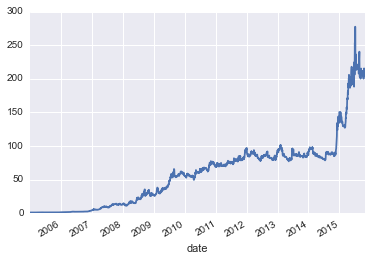

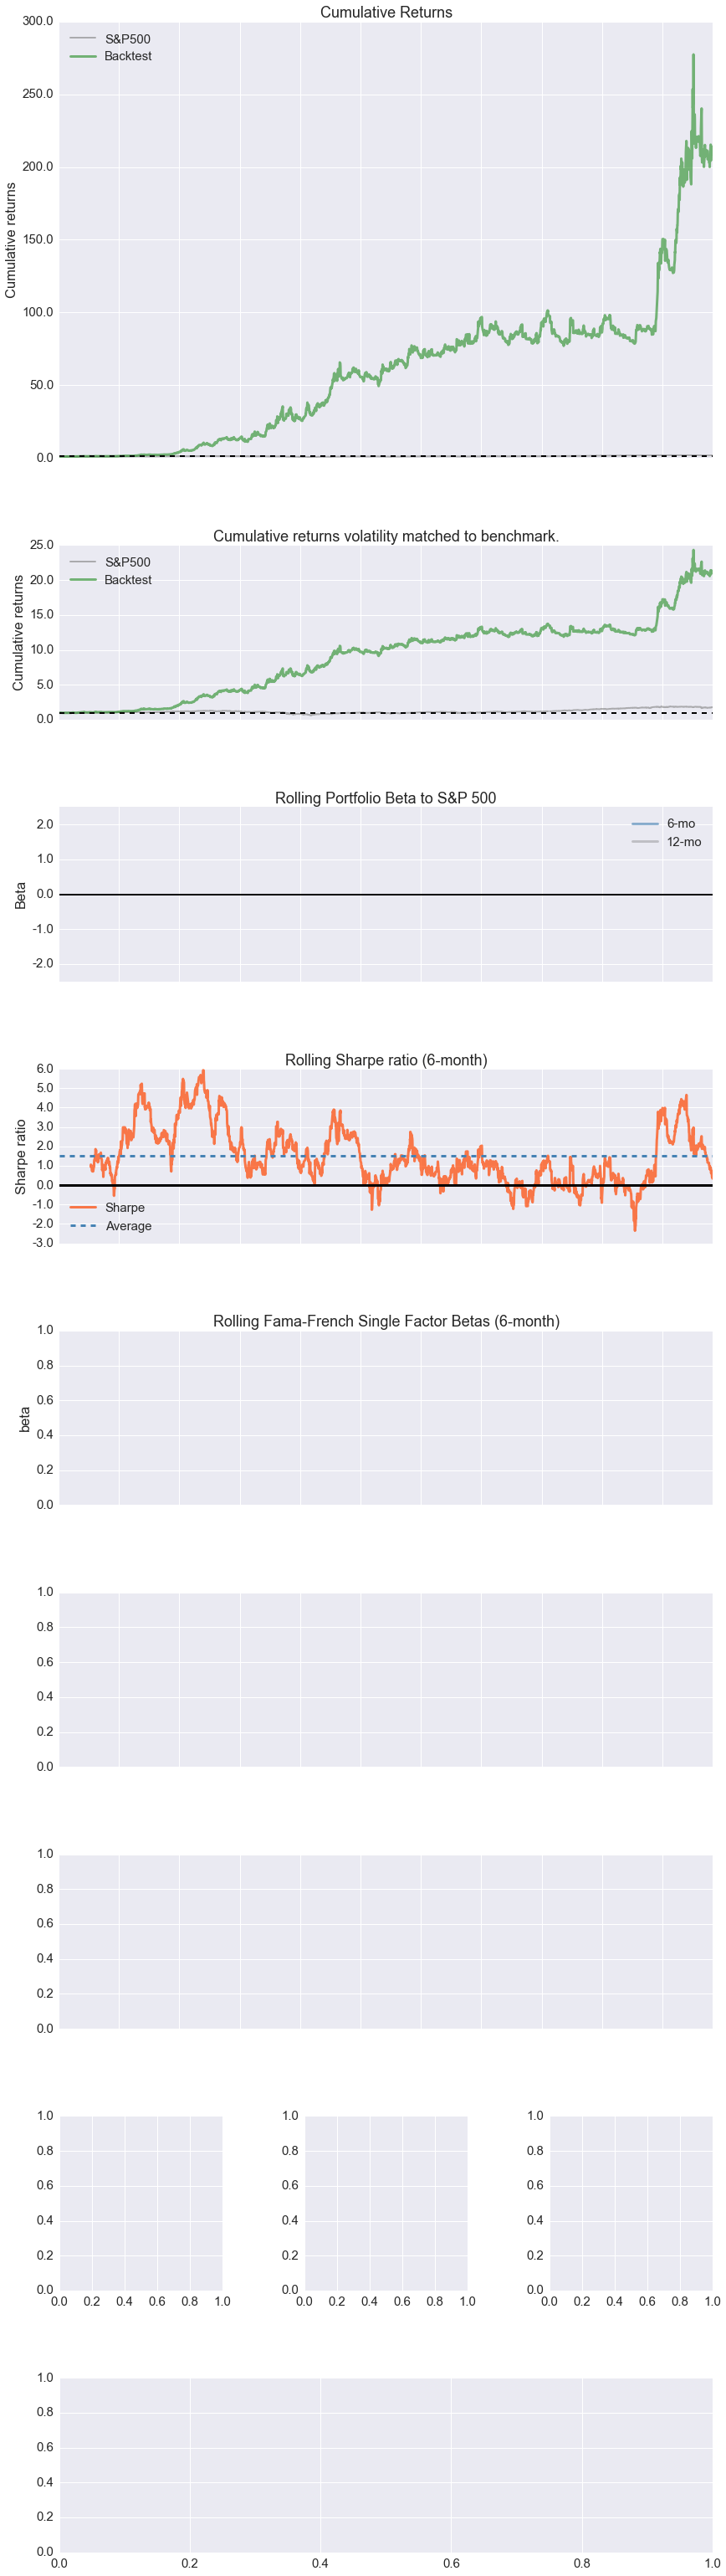

In [50]:
(1+returns.sum(1)/4).cumprod().plot()
ret_target = returns.sum(1) / 4
ret_target.index = data.index.tz_localize('UTC')
pf.create_full_tear_sheet(ret_target)

In [51]:
%run ../Strategy_Evalution_Tools/turtle_evalution.py

In [52]:
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

### insample vs. oos
returns_is = returns.ix[:, :]
returns_oos = returns.ix[1001::, :]
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 7)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    print(individual)
    for i in range(7) :
        if i == 0:
            rets = returns_is.ix[:,i] * individual[i]
        else :
            rets = rets + returns_is.ix[:,i] * individual[i]
        rets = rets.fillna(0)
        
    sharpe, rsharpe = Sharpe(rets)
    rrr = RRR(rets)
    if np.isnan(rsharpe) :
        rsharpe = 0
    print(rsharpe)
    return rsharpe,;

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    random.seed(64)
    
    pop = toolbox.population(n=128)
    hof = tools.HallOfFame(2)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, 
                                   stats=stats, halloffame=hof, verbose=True)
    #print(log)
    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()

array('b', [1, 0, 1, 0, 0, 1, 0])
-0.637074681163
array('b', [0, 0, 1, 1, 0, 0, 0])
-1.63973844874
array('b', [1, 0, 0, 0, 0, 0, 1])
-1.30562645871
array('b', [0, 0, 0, 0, 1, 1, 0])
-2.80306022545
array('b', [1, 0, 1, 1, 1, 1, 1])
-0.381502288899
array('b', [0, 0, 0, 0, 1, 0, 0])
5.08887558481
array('b', [0, 0, 1, 0, 0, 0, 1])
-1.56279755704
array('b', [0, 0, 1, 0, 0, 0, 0])
-4.73581282317
array('b', [1, 1, 1, 1, 1, 0, 1])
-0.392075865198
array('b', [0, 0, 1, 0, 0, 0, 0])
-4.73581282317
array('b', [0, 0, 0, 1, 1, 1, 1])
-1.08237327535
array('b', [0, 1, 1, 0, 0, 1, 0])
-0.77703640699
array('b', [0, 1, 1, 0, 1, 1, 1])
-0.545074731393
array('b', [0, 1, 1, 0, 0, 1, 0])
-0.77703640699
array('b', [1, 0, 0, 1, 1, 1, 0])
-0.576871676581
array('b', [1, 1, 1, 0, 1, 1, 0])
-0.406663918003
array('b', [0, 1, 1, 1, 0, 0, 0])
-0.957054698972
array('b', [0, 0, 1, 1, 0, 1, 0])
-0.835376570817
array('b', [0, 1, 1, 0, 0, 0, 1])
-0.904010932485
array('b', [0, 0, 1, 0, 0, 1, 0])
-1.24164691284
array('b', [

ValueError: min() arg is an empty sequence

In [42]:
pop

[array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [0, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 1, 1]),
 array('b', [1, 1, 1, 1, 1, 

In [43]:
hof.items

[array('b', [1, 1, 1, 1, 1, 1, 1]), array('b', [1, 0, 1, 1, 1, 1, 1])]

In [ ]:
import operator

from deap import base
from deap import creator
from deap import gp
from deap import tools

pset = gp.PrimitiveSet("MAIN", arity=1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,
               pset=pset)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.expr)

In [ ]:
### insample and out-of-sample  test
data = pd.read_csv('../../data/hs300.csv',index_col = 'date',parse_dates = 'date')
data.vol = data.vol.astype(float)

In [ ]:
a.